In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Importing helper visualisation functions
from minihack.tiles.rendering import get_des_file_rendering

import IPython.display
def render_des_file(des_file, **kwargs):
    image = get_des_file_rendering(des_file, **kwargs)
    IPython.display.display(image)

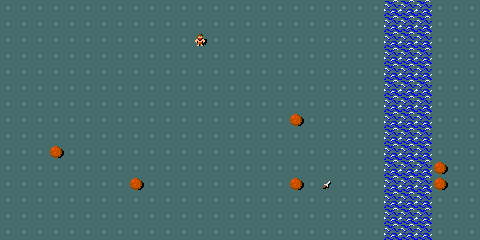

In [60]:
des_file = """
MAZE: "mylevel", ' '
FLAGS:premapped
GEOMETRY:center,center
MAP
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
..............................
ENDMAP
REGION: (0,0,30,30), lit, "ordinary"

$pool_loc = selection: fillrect (24,0,26,14)

TERRAIN: $pool_loc, 'P'

OBJECT: "boulder", random
OBJECT: "boulder", random
OBJECT: "boulder", random
OBJECT: "boulder", random
OBJECT: "boulder", random
OBJECT: "boulder", random
OBJECT: "dagger", random

"""
render_des_file(des_file, n_images=1)

In [4]:
import gym
import minihack

In [8]:
from minihack import MiniHackSkill
from minihack.envs import register

class MiniHackRiverCustom(MiniHackSkill):
    def __init__(self, *args, des_file, **kwargs):
        kwargs["max_episode_steps"] = kwargs.pop("max_episode_steps", 1000)
        super().__init__(*args, des_file=des_file, **kwargs)

env_name = "MiniHack-River-Custom-Task0-v0"
if env_name in gym.envs.registry.env_specs:
    del gym.envs.registry.env_specs[env_name]
        
register(
    id=env_name,
    entry_point="minihack.custom:MiniHackRiverCustom",
)

In [61]:
env = gym.make(
    "MiniHack-River-Custom-Task0-v0",
    des_file=des_file,
    max_episode_steps=1250,
    observation_keys=("pixel",),
)

In [62]:
env.reset() # each reset generates a new environment instance
env.step(1)  # move agent '@' north
env.render()


                                                                                
                                                                                
                                                                                
                                                                                
                        ........................}}}...                          
                        .................<@.....}}}...                          
                        ........................}}}...                          
                        ...............`...`....}}}...                          
                        ........................}}}...                          
                        ........................}}}...                          
                        ..........`.............}}}...                          
                        ....`...................}}}.`.                          
                        ...

In [63]:
env.step(1)  # move agent '@' north
env.render()


                                                                                
                                                                                
                                                                                
                                                                                
                        ........................}}}...                          
                        .................<.@....}}}...                          
                        ........................}}}...                          
                        ...............`...`....}}}...                          
                        ........................}}}...                          
                        ........................}}}...                          
                        ..........`.............}}}...                          
                        ....`...................}}}.`.                          
                        ...

In [32]:
from minihack.tiles.rendering import get_image

def render_observation(obs, **kwargs):
    image = get_image(obs, **kwargs)
    IPython.display.display(image)

In [64]:
s, r, d, info = env.step(1)

In [65]:
s

{'pixel': array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8)}

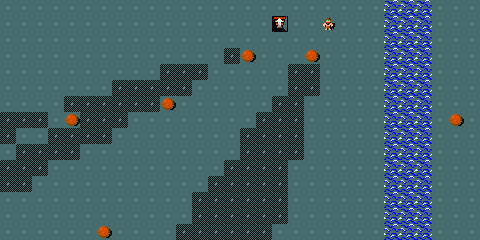

In [66]:
render_observation(s['pixel'])

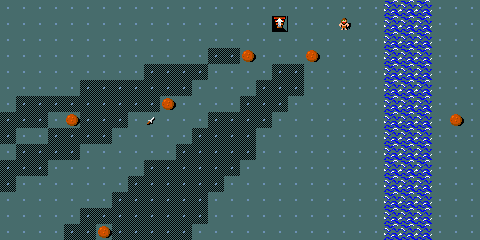

In [67]:
s, r, d, info = env.step(1)
render_observation(s['pixel'])

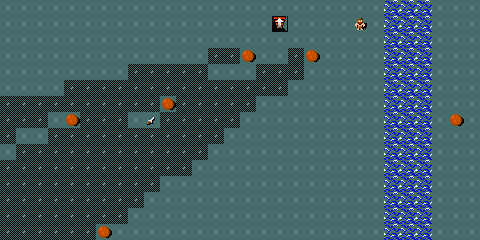

In [68]:
s, r, d, info = env.step(1)
render_observation(s['pixel'])

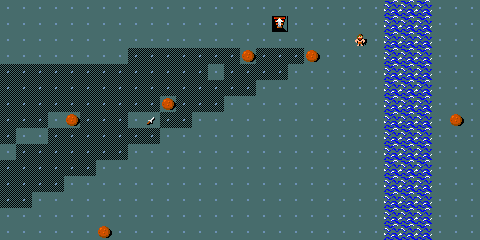

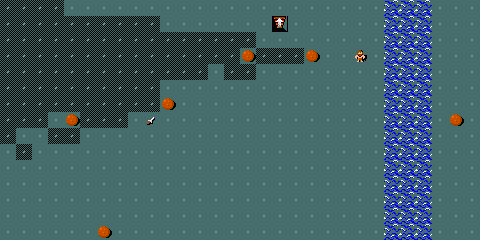

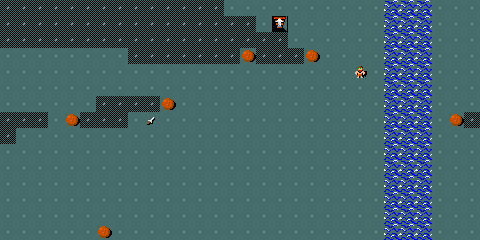

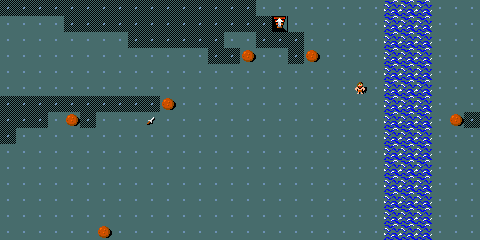

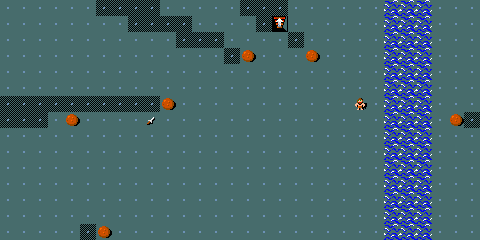

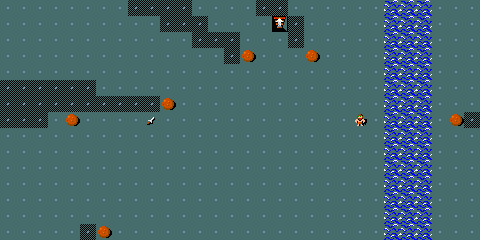

In [69]:
for i in range(0,6):
    s, r, d, info = env.step(2)
    render_observation(s['pixel'])

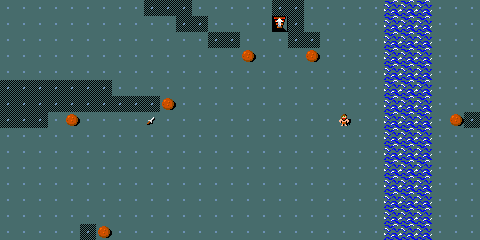

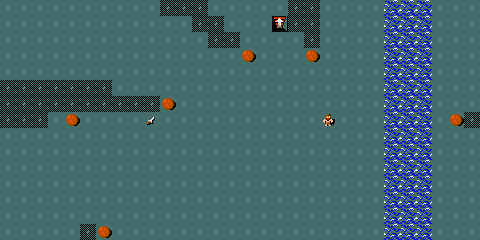

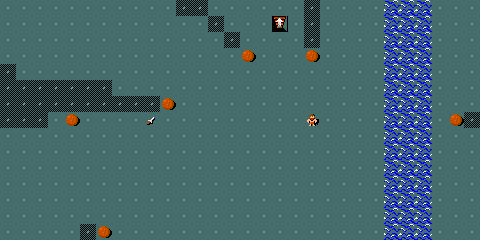

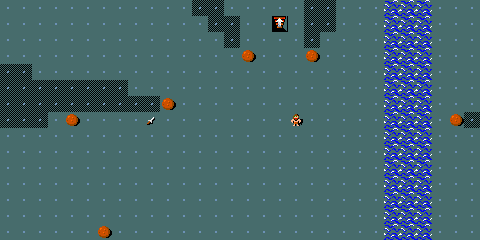

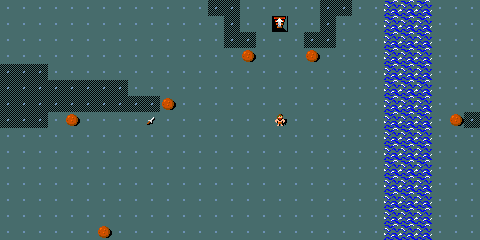

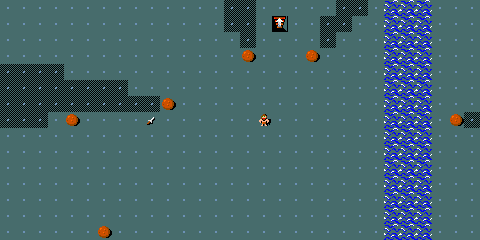

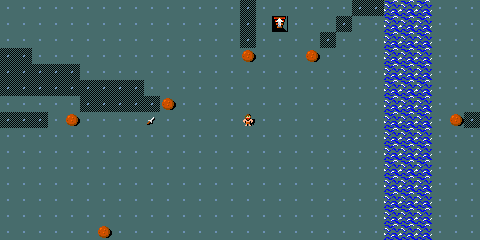

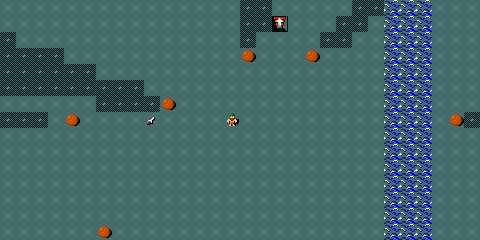

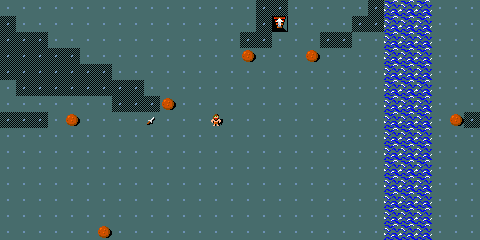

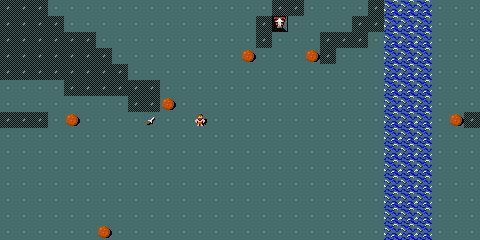

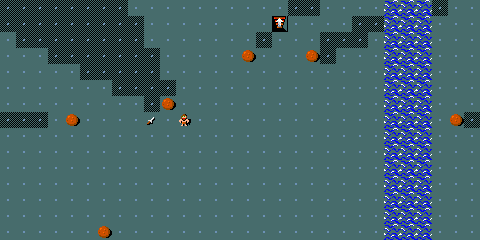

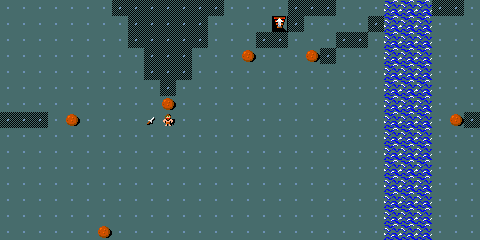

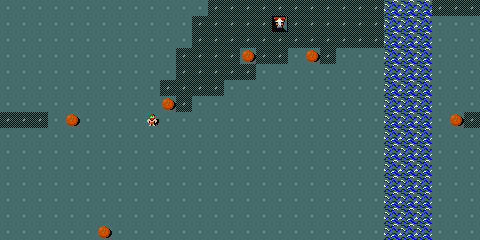

In [70]:
for i in range(0,13):
    s, r, d, info = env.step(3)
    render_observation(s['pixel'])

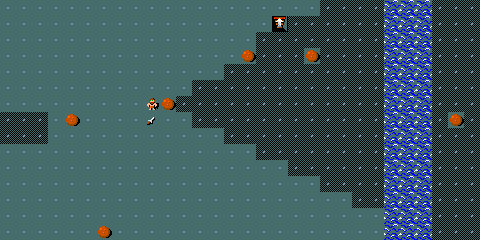

In [71]:
for i in range(0,1):
    s, r, d, info = env.step(0)
    render_observation(s['pixel'])

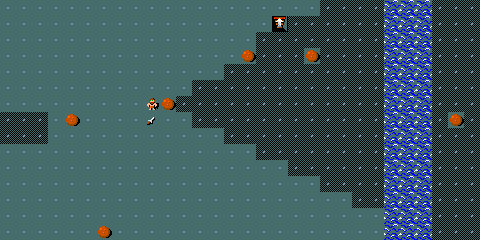

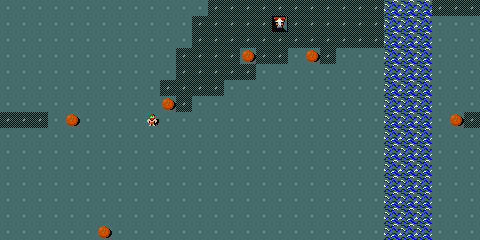

In [90]:
for i in range(0,2):
    s, r, d, info = env.step(2)
    render_observation(s['pixel'])

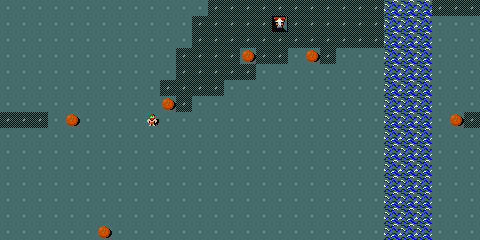

In [91]:
for i in range(0,1):
    s, r, d, info = env.step(49)
    render_observation(s['pixel'])

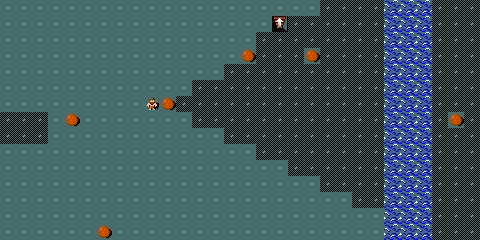

In [92]:
for i in range(0,1):
    s, r, d, info = env.step(0)
    render_observation(s['pixel'])

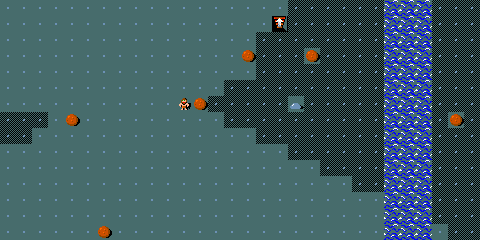

In [173]:
for i in range(0,1):
    s, r, d, info = env.step(1)
    render_observation(s['pixel'])

In [174]:
env.render()


With great effort you move the boulder.                                         
                                                                                
                                                                                
                                                                                
                        ........................}}}...                          
                        .................<......}}}...                          
                        ........................}}}...                          
                        ...............`...`....}}}...                          
                        ........................}}}...                          
                        ........................}}}...                          
                        ...........@`.....*.....}}}...                          
                        ....`...................}}}.`.                          
                        ...

In [161]:
env._actions[44] #40:kick, 49:pickup, 78:wield, 36:

<Command.MOVE: 109>

In [96]:
env._actions

(<CompassDirection.N: 107>,
 <CompassDirection.E: 108>,
 <CompassDirection.S: 106>,
 <CompassDirection.W: 104>,
 <CompassDirection.NE: 117>,
 <CompassDirection.SE: 110>,
 <CompassDirection.SW: 98>,
 <CompassDirection.NW: 121>,
 <CompassDirectionLonger.N: 75>,
 <CompassDirectionLonger.E: 76>,
 <CompassDirectionLonger.S: 74>,
 <CompassDirectionLonger.W: 72>,
 <CompassDirectionLonger.NE: 85>,
 <CompassDirectionLonger.SE: 78>,
 <CompassDirectionLonger.SW: 66>,
 <CompassDirectionLonger.NW: 89>,
 <MiscDirection.DOWN: 62>,
 <MiscDirection.WAIT: 46>,
 <MiscAction.MORE: 13>,
 <Command.ADJUST: 225>,
 <Command.APPLY: 97>,
 <Command.ATTRIBUTES: 24>,
 <Command.CALL: 67>,
 <Command.CAST: 90>,
 <Command.CHAT: 227>,
 <Command.CLOSE: 99>,
 <Command.DIP: 228>,
 <Command.DROP: 100>,
 <Command.DROPTYPE: 68>,
 <Command.EAT: 101>,
 <Command.ENGRAVE: 69>,
 <Command.ENHANCE: 229>,
 <Command.ESC: 27>,
 <Command.FIGHT: 70>,
 <Command.FIRE: 102>,
 <Command.FORCE: 230>,
 <Command.INVENTORY: 105>,
 <Command.INVENT

In [98]:
for i in range(0,1):
    s, r, d, info = env.step(140)
    render_observation(s['pixel'])

IndexError: tuple index out of range

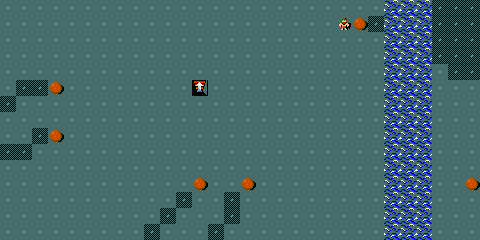

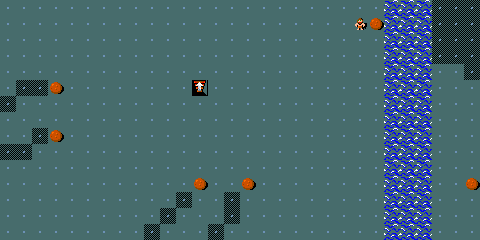

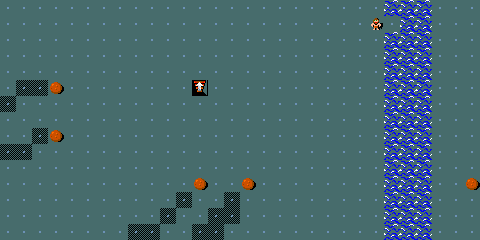

In [52]:
for i in range(0,3):
    s, r, d, info = env.step(1)
    render_observation(s['pixel'])

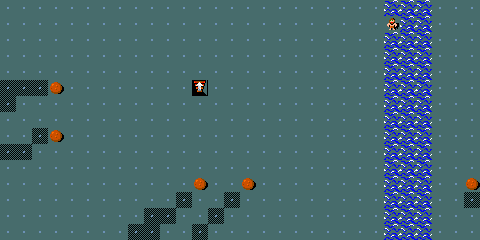

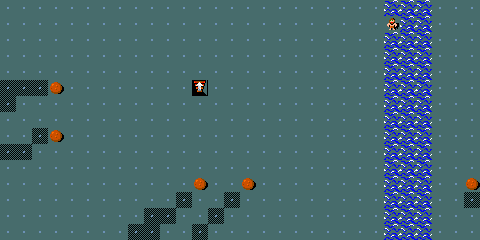

In [53]:
for i in range(0,2):
    s, r, d, info = env.step(1)
    render_observation(s['pixel'])

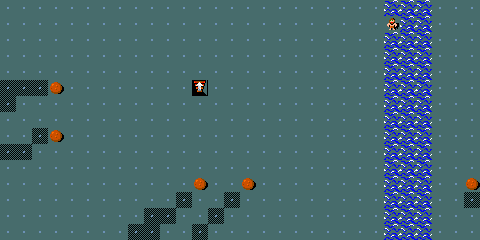

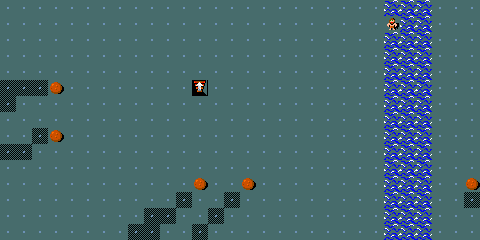

In [54]:
for i in range(0,2):
    s, r, d, info = env.step(1)
    render_observation(s['pixel'])

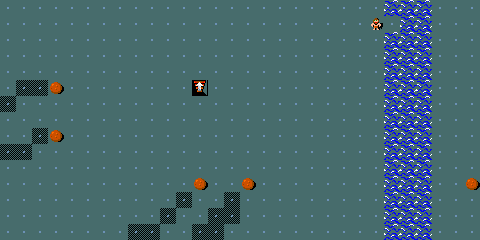

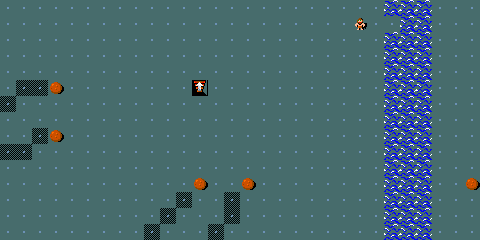

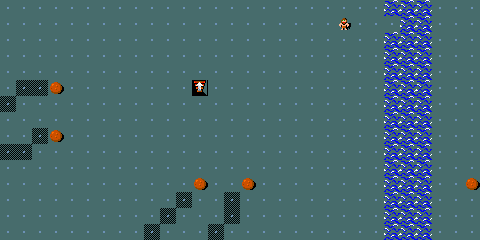

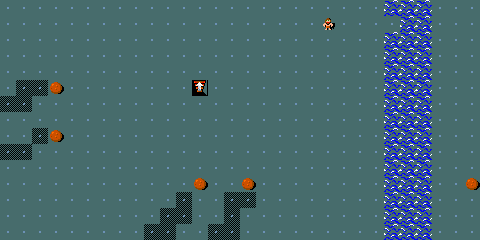

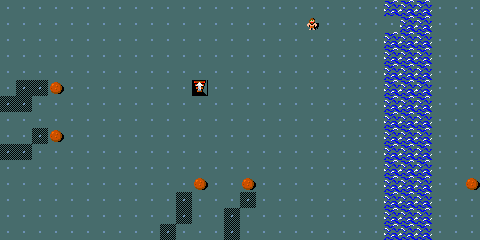

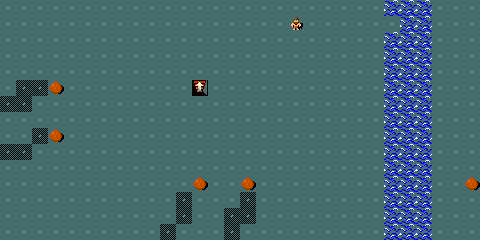

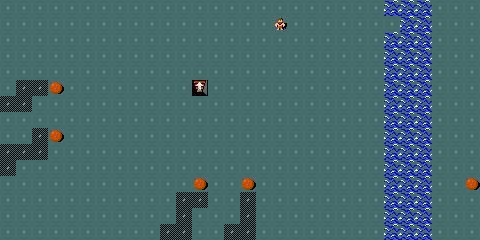

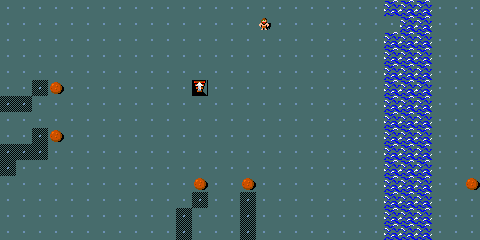

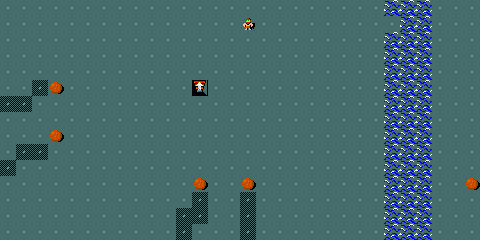

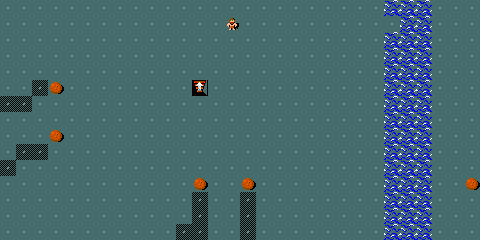

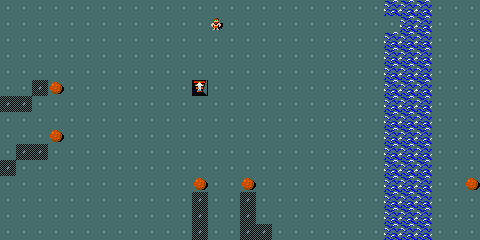

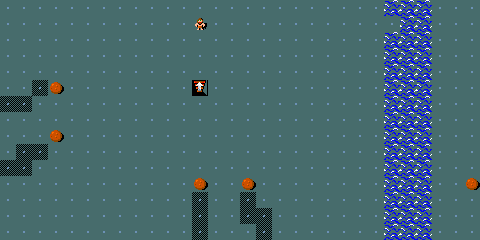

In [55]:
for i in range(0,12):
    s, r, d, info = env.step(3)
    render_observation(s['pixel'])

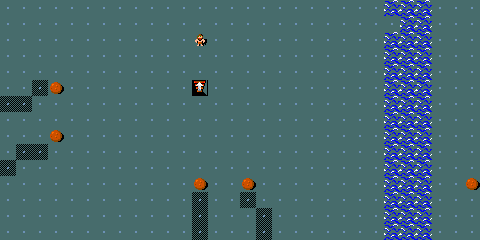

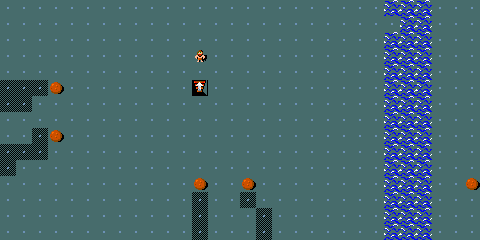

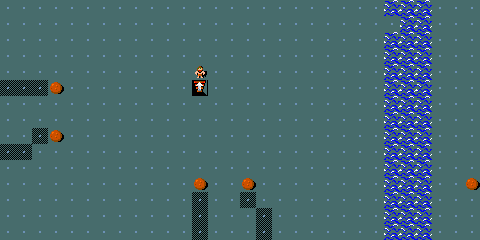

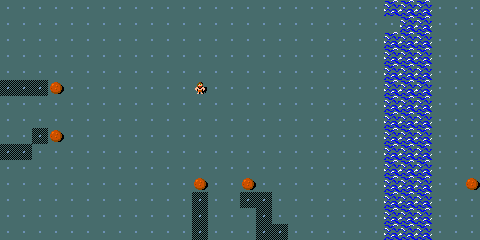

In [56]:
for i in range(0,4):
    s, r, d, info = env.step(2)
    render_observation(s['pixel'])

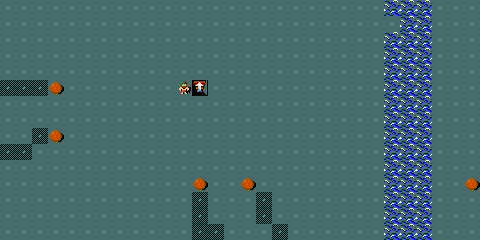

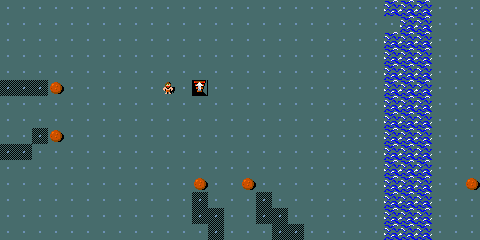

In [59]:
for i in range(0,2):
    s, r, d, info = env.step(3)
    render_observation(s['pixel'])